In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [3]:
dataset = 'https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv'

final_dir = '\\'.join(os.getcwd().split('\\')[:-1])

In [4]:
od.download(dataset, data_dir=final_dir)

final_dir += '\\youtube-trending-video-dataset\\US_youtube_trending_data.csv'

100%|█████████████████████████████████████████████████████████████████████████████| 1.18G/1.18G [00:28<00:00, 44.2MB/s]


In [5]:
data = pd.read_csv(final_dir)

data.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [6]:
# Checking the shape of the DataFrame
data.shape

(187790, 16)

In [7]:
# Dropping channelID column as it is not necessary for the analysis and prediction 

data.drop(['channelId'], axis = 1, inplace = True)

# Validating the above code

data.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [8]:
# Checking null values

def null_values(df):
    temp = df.isna().sum()
    temp_1 = round(temp * 100 / df.shape[0], 2)
    
    return pd.DataFrame((temp, temp_1), index = ['Count', 'Percentage']).T.sort_values('Count', ascending = False)


null_values(data)

,Count,Percentage
description,4061.0,2.16
title,0.0,0.00
publishedAt,0.0,0.00
channelTitle,0.0,0.00
categoryId,0.0,0.00
trending_date,0.0,0.00
tags,0.0,0.00
view_count,0.0,0.00
likes,0.0,0.00
dislikes,0.0,0.00


We can see that there are around 10% missing values in `description` column and only 1 missing value in `channelTitle` column.
- We shall keep the `description` column as it is while analysis and do the null value treatment during model building.
- We shall delete one row from which has the null value in `channelTitle` column.

# Deleting one row where there is null value in 'channelTitle' column

data.dropna(subset = ['channelTitle'], how = 'any', inplace = True)

# Validating the above code

null_values(data).loc['channelTitle',:]

In [10]:
# Let's check the datatypes of each column in DataFrame

data.dtypes

title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

- `publishedAt`, `trending_date` are object type. Let's convert it to Datetime format.

In [11]:
# Converting 'publishedAt' and 'trending_date' to datetime objects

data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['trending_date'] = pd.to_datetime(data['trending_date'])

# Validating the above changes

data.dtypes[['publishedAt', 'trending_date']]

publishedAt      datetime64[ns, UTC]
trending_date    datetime64[ns, UTC]
dtype: object

In [12]:
# Getting new column 'daysTakenToTrend' which gives us the information about the number of days taken by the video to get into the trending videos

data['daysTakenToTrend'] = (data['trending_date'] - data['publishedAt']).dt.days

# Validating the above code

data.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,daysTakenToTrend
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",0
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,0


In [13]:
data['categoryId'].unique()


array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29],
      dtype=int64)

We can see that `categoryId` column has id's of repective categories. We can access the description of categoryId from the `US_category_id.json` file.

In [14]:
# Let's import US_category_id.json file and map the category id's respectively

category_path = '\\'.join(final_dir.split('\\')[:-1]) + '\\US_category_id.json'


# Creating a dictionary object which stores the category id and its respective category
category_dict = {}

with open(category_path, 'r') as file:
    json_data = json.load(file)
    for item in json_data['items']:
        category_dict[int(item['id'])] = item['snippet']['title']
    
data['categoryId'] = data['categoryId'].apply(lambda x: category_dict[x])

# Validating the above code
data['categoryId'].head()

0    People & Blogs
1            Gaming
2     Entertainment
3             Music
4     Howto & Style
Name: categoryId, dtype: object

<b> Note: </b>
- Although we were using IN data for analysis. The `IN_category_id.json` was missing some data.
- Upon research, we found out that the `id` and `title` are same irrespective of the country.
- Hence, we have used `US_category_id.json` in the above case.

In [15]:
# Checking the Dataframe after the changes

data.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,daysTakenToTrend
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",0
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,0
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,Music,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,0
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,0


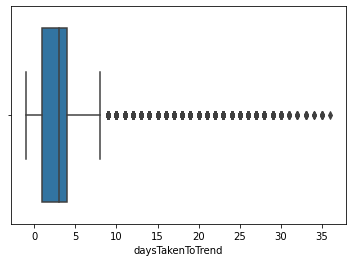

In [16]:
# Let's plot a Boxplot for 'daysTakenToTrend' column

sns.boxplot(data['daysTakenToTrend'])
plt.show()

There are some values less than 0. It is impossible for a video to trend before it was published.

<AxesSubplot:ylabel='Frequency'>

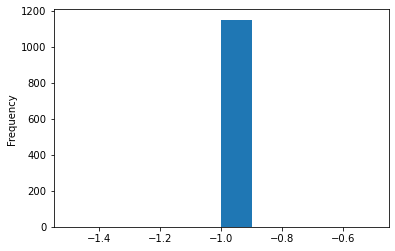

In [17]:
data[data['daysTakenToTrend'] < 0]['daysTakenToTrend'].plot.hist()

However, we can see that the negative days do no exceed -1.0. This might be because of some server lag or timezone difference. Let's conver those negative days to 0.

In [18]:
# Converting negative days in 'daysTakenToTrend' column to 0

data['daysTakenToTrend'] = data['daysTakenToTrend'].apply(lambda x: x if x>0 else 0)

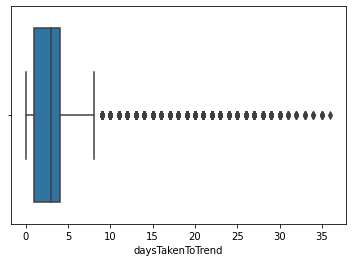

In [19]:
# Plotting boxplot after the changes

sns.boxplot(data['daysTakenToTrend'])
plt.show()

#### Here we can see that tag usage is not an affecting factor for the video to trend

In [20]:
data['tagCount'] = data['tags'].apply(lambda x: 0 if type(x) == float else len(list(x.split('|'))))

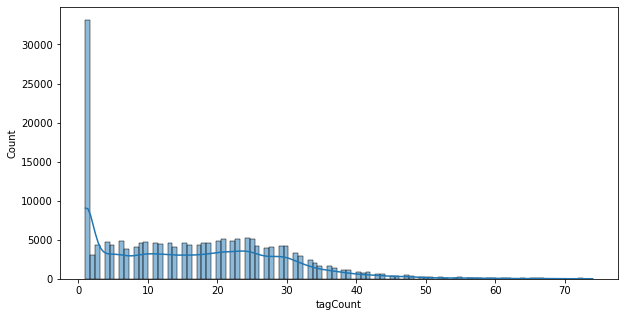

In [21]:
plt.figure(figsize = (10, 5))
sns.histplot(data['tagCount'], kde = True)
plt.show()

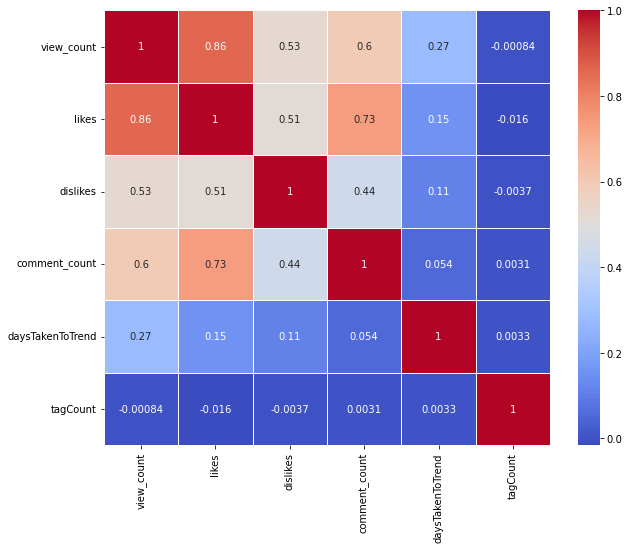

In [41]:
# Let's check the correlation between the numerical columns

plt.figure(figsize = (10, 8))
sns.heatmap(data[['view_count', 'likes', 'dislikes', 'comment_count', 'daysTakenToTrend', 'tagCount']].corr(), linewidths=.5, annot=True, cmap='coolwarm')
plt.show()

- `view_count` and `likes` are highly correlated. It is more likely that the video with more views has more likes.
- `comment_count` and `likes` are relatively highly correlated when compared to `comment_count` and `views`.
- `daysTakenToTrend` is not correlated to any feature. Which is interesting as it is impossible to correlate how many days the video will take to trend based on comment_count or dislikes or likes or view_count.

In [39]:
######################### likes per view

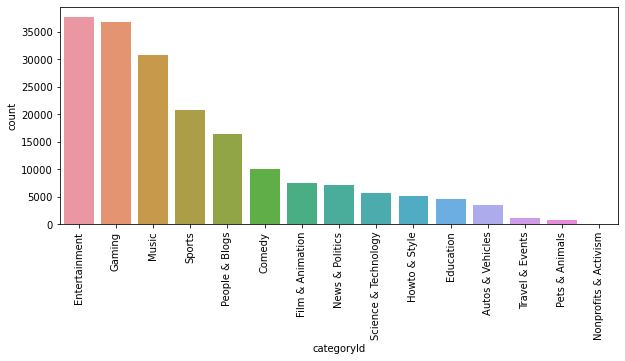

In [24]:
# Checking number of videos based on each Category

plt.figure(figsize = (10, 4))
sns.countplot(data['categoryId'], order = data['categoryId'].value_counts().sort_values(ascending = False).index)
plt.xticks(rotation = 90)
plt.show()

There are more `Entertainment` videos and least type is `Nonprofits & Activism`

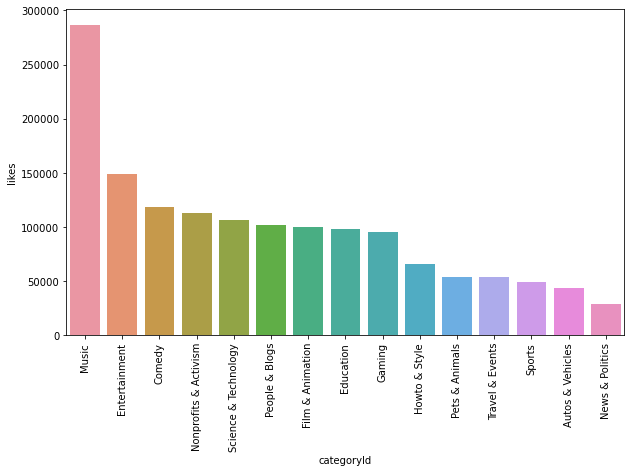

In [25]:
plt.figure(figsize = (10, 6))
sns.barplot(data = data, x = 'categoryId', y = 'likes',
            order = data.groupby('categoryId')['likes'].mean().sort_values(ascending = False).index, ci = 0)

plt.xticks(rotation = 90)
plt.show()

- `Pets & Animals` videos has most average likes and `New & Policts` videos has least average likes.

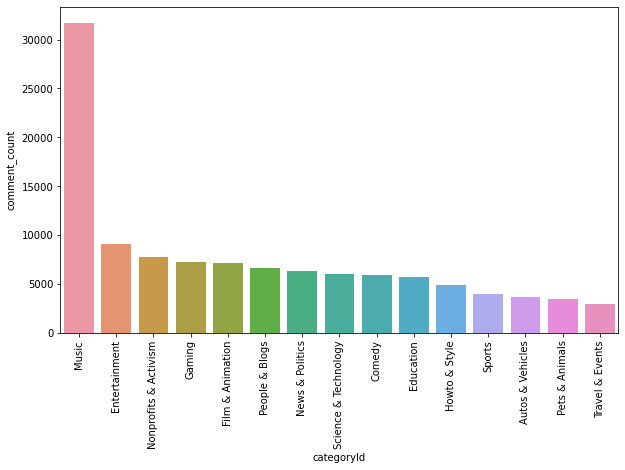

In [26]:
plt.figure(figsize = (10, 6))
sns.barplot(data = data, x = 'categoryId', y = 'comment_count',
            order = data.groupby('categoryId')['comment_count'].mean().sort_values(ascending = False).index, ci = 0)

plt.xticks(rotation = 90)
plt.show()

`Music` videos has most average comment count and `Nonprofits & Activism` has least average comment count.

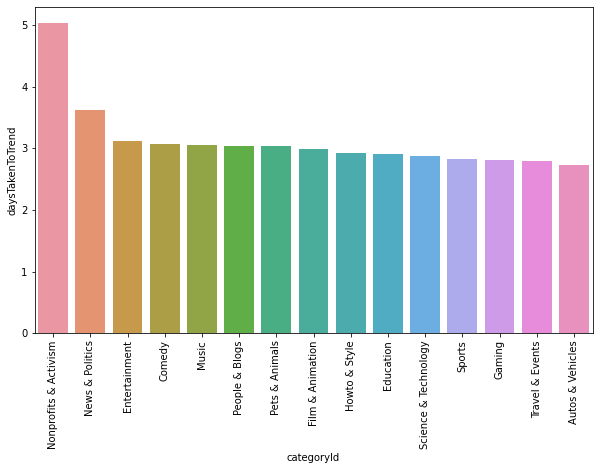

In [27]:
plt.figure(figsize = (10, 6))
sns.barplot(data = data, x = 'categoryId', y = 'daysTakenToTrend',
            order = data.groupby('categoryId')['daysTakenToTrend'].mean().sort_values(ascending = False).index, ci = 0)

plt.xticks(rotation = 90)
plt.show()

It is interesting to note that `News & Politics` videos take less time to trend and `Music`, `Comedy` and `Pets & Animals` videos take more time to trend.

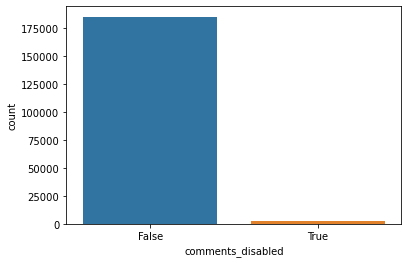

In [28]:
sns.countplot(data['comments_disabled'])
plt.show()

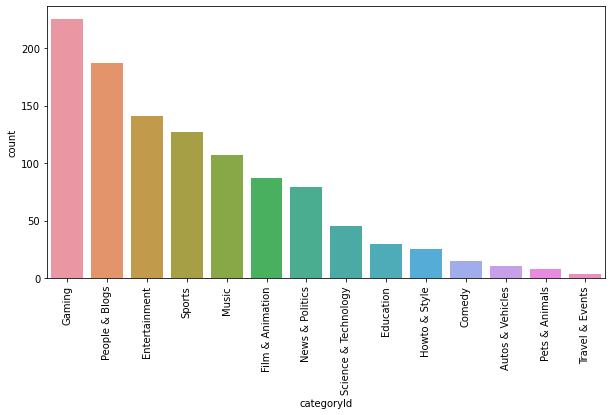

In [29]:
plt.figure(figsize = (10, 5))
sns.countplot(data[data['ratings_disabled'] == True]['categoryId'], 
              order = data[data['ratings_disabled'] == True].groupby('categoryId')['ratings_disabled'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 90)
plt.show()

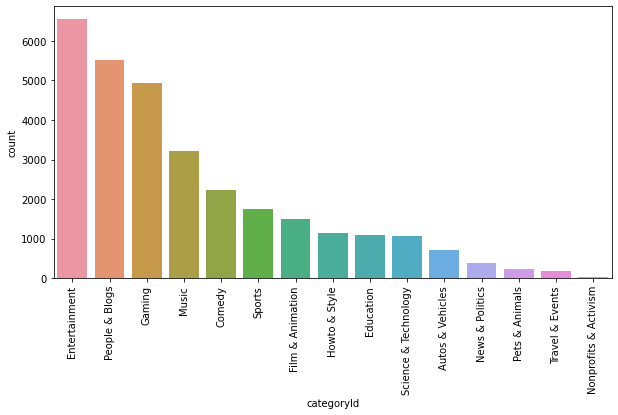

In [30]:
plt.figure(figsize = (10, 5))
sns.countplot(data[data['tags'] == '[None]']['categoryId'], 
              order = data[data['tags'] == '[None]'].groupby('categoryId')['ratings_disabled'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 90)
plt.show()

In [31]:
# Let's extract weekday from the trendingdate
data['day'] = data['trending_date'].dt.day_name()

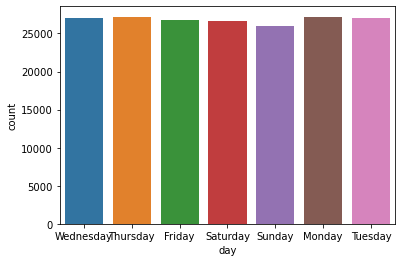

In [32]:
# Let's plot number of trending videos for each day of the week
sns.countplot(data['day'])
plt.show()

In [44]:
# Daily several videos trend but which video trends for the longest number of days will be the question.

<AxesSubplot:xlabel='categoryId', ylabel='count'>

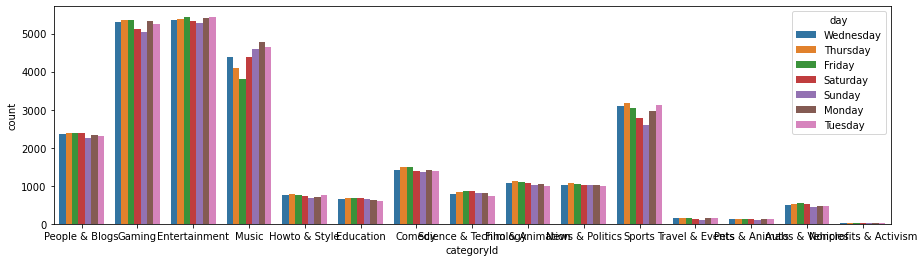

In [33]:
# Modify
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'categoryId', hue = 'day')

<AxesSubplot:xlabel='categoryId'>

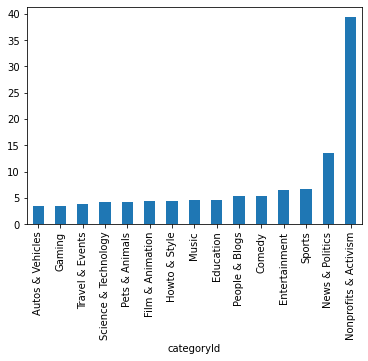

In [34]:
# categories that are taking minimum or moderate or maximum number of days to trend
(data.groupby('categoryId')['daysTakenToTrend'].var().sort_values()).plot.bar()

In [35]:

data['like/dislike ratio'] = round(data['likes']/data['dislikes'], 2)

<AxesSubplot:xlabel='like/dislike ratio', ylabel='categoryId'>

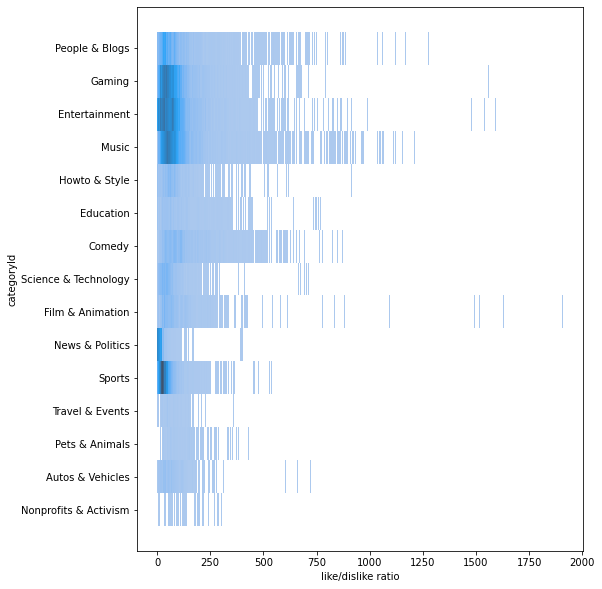

In [36]:
# Modify
plt.figure(figsize = (8, 10))
sns.histplot(data = data, x = 'like/dislike ratio', y = 'categoryId')